#Part-1 Using logistic regression to determine whether a person has diabetes

**Note: please run both parts seperately

In [335]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [336]:
dat=pd.read_csv("/content/diabetes.csv")

# New Section

In [337]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [338]:
dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [339]:
dat.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [340]:
dat.shape

(768, 9)

In [341]:
correlation_matrix=dat.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


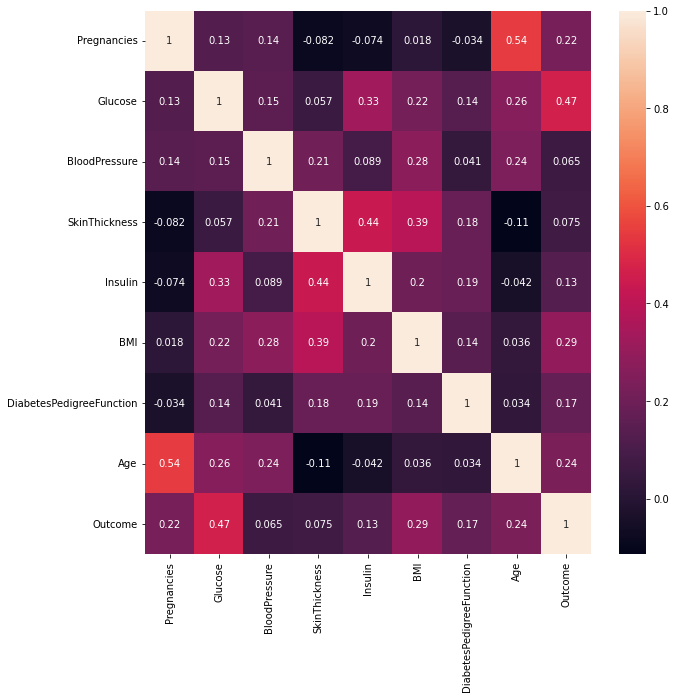

In [342]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

In [343]:
X=dat.iloc[:,:8]
X=(X-np.min(X))/np.max(X)-np.min(X)
# X.insert(0,"bias",[1 for _ in range(len(X))])
features=np.asmatrix(X)


In [344]:
Y=dat['Outcome']
Y
target=np.asmatrix(Y)


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,average_precision_score

In [346]:

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.6, random_state=42)

In [347]:
X_val, X_test, Y_val, Y_test=train_test_split(X_test, Y_test, train_size=0.5, random_state=42)

In [348]:

print('Total number of data items:', len(X))
print('\nNumber of data points in the training dataset:', len(X_train))
print('\nNumber of data points in the validation dataset:', len(X_val))
print('\nNumber of data points in the test dataset:', len(X_test))
print('\nShape of the training dataset:', X_train.shape)
print('\nShape of the validation dataset:', X_val.shape)
print('\nShape of the test dataset:', X_test.shape)
print('\n Training dataset type:', type(X_train))
print('\n Validation dataset type', type(X_val))
print('\n Test dataset type:', type(X_test))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the validation dataset: 154

Number of data points in the test dataset: 154

Shape of the training dataset: (460, 8)

Shape of the validation dataset: (154, 8)

Shape of the test dataset: (154, 8)

 Training dataset type: <class 'pandas.core.frame.DataFrame'>

 Validation dataset type <class 'pandas.core.frame.DataFrame'>

 Test dataset type: <class 'pandas.core.frame.DataFrame'>


In [349]:
#Initializing variables
np.random.seed(42)
w=np.random.randn(X_train.shape[1],1)*0.1
X_train.shape
m=X_train.shape[0]
iter=10000
alpha=0.01
lamda=0.01
cost_history=[]
accuracy=[]
b=0
Y_test=Y_test.to_numpy()
Y_train=Y_train.to_numpy()
Y_test=Y_test.reshape(Y_test.shape[0],1)
Y_train=Y_train.reshape(Y_train.shape[0],1)


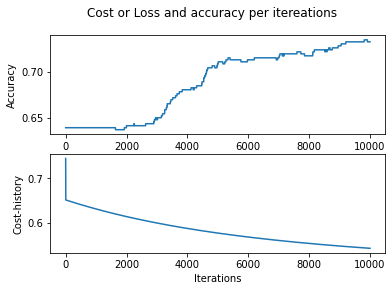

In [350]:
#sigmoid function
def sigmoid(z):
  return 1/(1+np.exp((-1)*z))

#logistic regression model
for i in range(iter):
  z = np.dot(X_train,w) + b  
  hx=sigmoid(z)
  part1=np.multiply(np.log(hx),Y_train)
  part2=np.multiply((1-Y_train),np.log(1-hx))
  cost=(-1/m)*np.sum(part1+part2)
  cost_history.append(np.squeeze(cost))
  accuracy.append(np.squeeze(accuracy_score(Y_train,(np.where(hx>0.5,1,0)))))
  dz=hx-Y_train
  gradient=np.dot(X_train.T,dz)
  w=w-(alpha/m)*gradient 
  b = b - (alpha/m)*np.sum(dz)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Cost or Loss and accuracy per itereations')

ax1.plot(accuracy)
ax1.set_ylabel('Accuracy')
ax2.plot(cost_history)
ax2.set_ylabel('Cost-history')
ax2.set_xlabel('Iterations')
plt.show()



In [351]:
 #prediction using validation
 Y_val=Y_val.to_numpy()
 Y_val=Y_val.reshape(Y_val.shape[0],1)

 Y_pred=sigmoid(np.dot(X_val,w) + b)
 Y_pred.shape
 Y_pred=np.where(Y_pred>0.5,1,0)
 score=accuracy_score(Y_val,Y_pred)
 score
print('Accuracy-score of the model:', score) 

Accuracy-score of the model: 0.8051948051948052


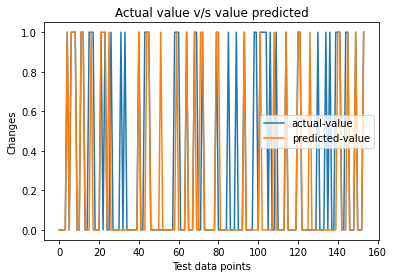

In [352]:
plt.plot(Y_val,label='actual-value')
plt.plot(Y_pred,label='predicted-value')
plt.xlabel('Test data points')
plt.title('Actual value v/s value predicted')
plt.ylabel('Changes')
plt.legend()
plt.show()

# Part 2 Neural Network

In [367]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
import pandas as pd

In [368]:
from tensorflow import keras

In [369]:
data=pd.read_csv('/content/diabetes.csv')
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [370]:
X=data.iloc[:,:8]
X.shape
Y=data.iloc[:,-1:]
Y.shape


(768, 1)

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,average_precision_score

In [372]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.6, random_state=42)

In [373]:
X_val, X_test, Y_val, Y_test=train_test_split(X_test, Y_test, train_size=0.5, random_state=42)

In [374]:
X_val.shape

(154, 8)

In [375]:
print('Total number of data items:', len(X))
print('\nNumber of data points in the training dataset:', len(X_train))
print('\nNumber of data points in the validation dataset:', len(X_val))
print('\nNumber of data points in the test dataset:', len(X_test))
print('\nShape of the training dataset:', X_train.shape)
print('\nShape of the validation dataset:', X_val.shape)
print('\nShape of the test dataset:', X_test.shape)
print('\n Training dataset type:', type(X_train))
print('\n Validation dataset type', type(X_val))
print('\n Test dataset type:', type(X_test))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the validation dataset: 154

Number of data points in the test dataset: 154

Shape of the training dataset: (460, 8)

Shape of the validation dataset: (154, 8)

Shape of the test dataset: (154, 8)

 Training dataset type: <class 'pandas.core.frame.DataFrame'>

 Validation dataset type <class 'pandas.core.frame.DataFrame'>

 Test dataset type: <class 'pandas.core.frame.DataFrame'>




 Validation-Loss 81.64677023887634  % VAlidation-Accuracy: 72.07792401313782  %
5/5 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.7468


 Test-Loss 86.37399077415466  % Test-Accuracy: 74.67532753944397  %


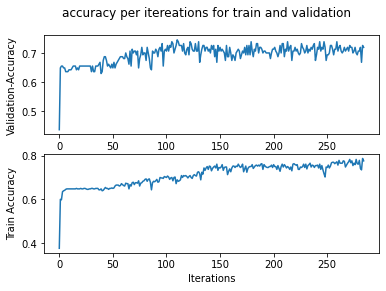

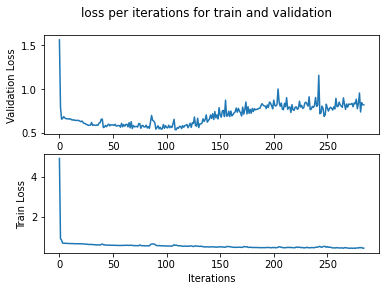

In [376]:
# =========================== No Regularization===========================

# Creating the model.
#  create  keras model with no regularization
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=285, batch_size=92,verbose=0)


# Evaluating the model: validation 
val_loss, val_accuracy = history.history['val_loss'][-1],history.history['val_accuracy'][-1]
print('\n\n Validation-Loss', val_loss*100,' %', 'VAlidation-Accuracy:', val_accuracy*100,' %')

# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('\n\n Test-Loss', test_loss*100,' %', 'Test-Accuracy:', test_accuracy*100,' %')

#Accuracy plots for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('accuracy per itereations for train and validation')

ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('Validation-Accuracy')

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('Train Accuracy')
ax2.set_xlabel('Iterations')

plt.show()

#loss plot for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('loss per iterations for train and validation')

ax1.plot(history.history['val_loss'])
ax1.set_ylabel('Validation Loss')

ax2.plot(history.history['loss'])
ax2.set_ylabel('Train Loss')
ax2.set_xlabel('Iterations')
plt.show()

Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_739 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_740 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_741 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_742 (Dense)            (None, 1)                 9         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________
None


 Validation-Loss 0.5736437439918518 Validation-Accuracy: 0.7597402334213257
5/5 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7662


 Test-Loss 0.5577716827392578 Test-Accuracy: 0.7662337422370911


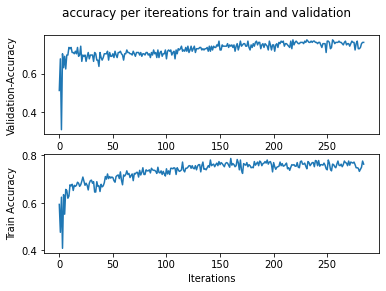

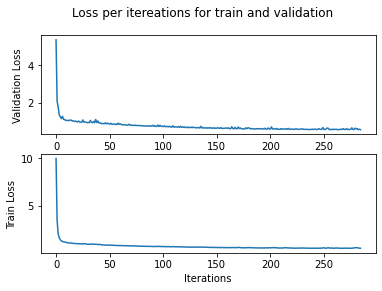

In [363]:
#================ L1 REGULARIZER =================

# keras nn model 
modell1 = Sequential()

# 2 hidden layers

modell1.add(Dense(12, input_dim=8, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)))
modell1.add(Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)))
modell1.add(Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)))

modell1.add(Dense(1, activation='sigmoid'))




modell1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
print(modell1.summary())

# Training the model.
history = modell1.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=285, batch_size=92,verbose=0)

# Evaluating the model
val_loss, val_accuracy = history.history['val_loss'][-1],history.history['val_accuracy'][-1]
print('\n\n Validation-Loss', val_loss, 'Validation-Accuracy:', val_accuracy)

# Evaluating the model
test_loss, test_accuracy = modell1.evaluate(X_test, Y_test)
print('\n\n Test-Loss', test_loss, 'Test-Accuracy:', test_accuracy)

#Accuracy plots for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('accuracy per itereations for train and validation')

ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('Validation-Accuracy')

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('Train Accuracy')
ax2.set_xlabel('Iterations')

plt.show()

#loss plot for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Loss per itereations for train and validation')

ax1.plot(history.history['val_loss'])
ax1.set_ylabel('Validation Loss')
ax2.plot(history.history['loss'])
ax2.set_ylabel('Train Loss')
ax2.set_xlabel('Iterations')
plt.show()

Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_743 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_744 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_745 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_746 (Dense)            (None, 1)                 9         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________
None


 Validation-Loss 0.5256118774414062 Validation-Accuracy: 0.7662337422370911
5/5 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7532


 Test-Loss 0.556374728679657 Test-Accuracy: 0.7532467246055603


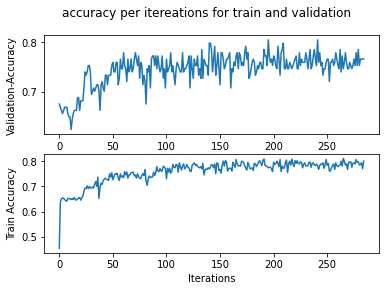

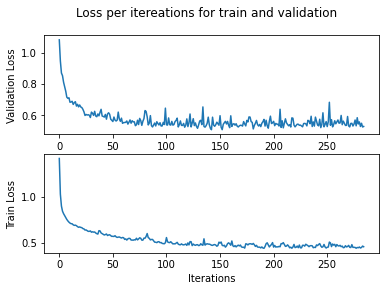

In [364]:
#================ L2 REGULARIZER =================


# keras nn model 
modell2 = Sequential()

# 2 hidden layers
modell2.add(Dense(12, input_dim=8, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
modell2.add(Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
modell2.add(Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))

modell2.add(Dense(1, activation='sigmoid'))



modell2.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
print(modell2.summary())

# Training the model.
history = modell2.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=285, batch_size=92,verbose=0)

# Evaluating the model
val_loss, val_accuracy = history.history['val_loss'][-1],history.history['val_accuracy'][-1]
print('\n\n Validation-Loss', val_loss, 'Validation-Accuracy:', val_accuracy)

# Evaluating the model
test_loss, test_accuracy = modell2.evaluate(X_test, Y_test)
print('\n\n Test-Loss', test_loss, 'Test-Accuracy:', test_accuracy)

#Accuracy plots for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('accuracy per itereations for train and validation')

ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('Validation-Accuracy')

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('Train Accuracy')
ax2.set_xlabel('Iterations')

plt.show()

#loss plot for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Loss per itereations for train and validation')

ax1.plot(history.history['val_loss'])
ax1.set_ylabel('Validation Loss')
ax2.plot(history.history['loss'])
ax2.set_ylabel('Train Loss')
ax2.set_xlabel('Iterations')
plt.show()


5/5 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6753

 Validation-Loss 0.6340133547782898 Validation-Accuracy: 0.6753246784210205
5/5 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6623

  Test-Loss 0.640593945980072 Test-Accuracy: 0.6623376607894897


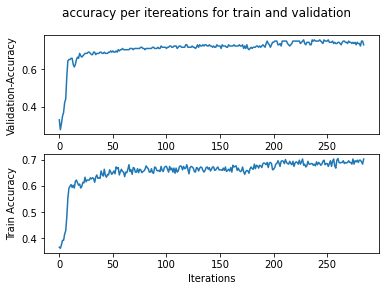

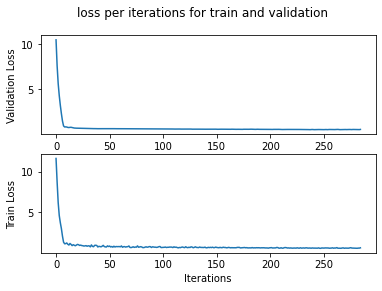

In [365]:
#================ DROPOUT REGULARIZER =================

# Neural Network with 2 Hidden Layers.

# Creating nn model.
model_dropout = Sequential()
model_dropout.add(Dense(8, input_dim=8, activation='relu'))

model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dropout(0.01))

model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dropout(0.01))

model_dropout.add(Dense(1, activation='sigmoid'))



model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model.
history = model_dropout.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=285, batch_size=92,verbose=0)


# Evaluating the model: validation 
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print('\n Validation-Loss', val_loss, 'Validation-Accuracy:', val_accuracy)

# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('\n  Test-Loss', test_loss, 'Test-Accuracy:', test_accuracy)

#Accuracy plots for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('accuracy per itereations for train and validation')

ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('Validation-Accuracy')

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('Train Accuracy')
ax2.set_xlabel('Iterations')

plt.show()

#loss plot for validation and train data
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('loss per iterations for train and validation')

ax1.plot(history.history['val_loss'])
ax1.set_ylabel('Validation Loss')
ax2.plot(history.history['loss'])
ax2.set_ylabel('Train Loss')
ax2.set_xlabel('Iterations')
plt.show()